***Importing Libraries***

In [26]:
import pandas as pd#import all of the related python libraries to be able to deal with the data 
import numpy as np
import glob
import sklearn.preprocessing
import struct
import ctypes
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import math 
import os, shutil

These are the functions that will perform the EDA 

In [27]:
#This Function will plot the correlation matrix for the data passed into it 
#This function will take two inputs correlation_data which is the data you want to find the correlation for and elements_per_matrix which is how many points you want to be displayed per matrix 
#There is no return value as the purpose is to plot the correlation matrix 
def CorrPlot(correlation_data,elements_per_matrix):
    corrmatrix=correlation_data.corr()#create a correlation matrix 
    #top_corr_features=corrmatrix.index#assign the column names from the data to the matirx
    elements=math.floor(correlation_data.shape[1]/elements_per_matrix)#Find the number of elements needed per matrix 
    ClearFiles('..\Plots\Correlation_matrixes')#Delete all of the files from the folder so new ones can be saved 
    for i in range(1,elements+1):#Go through all of the matrixes
        if (i==1):
            corrmat=corrmatrix.iloc[1:(i*elements_per_matrix),1:(i*elements_per_matrix)]#if the I is one start at one so there is not a zero to get the smaller matrix
        else: 
            corrmat=corrmatrix.iloc[(i-1)*elements_per_matrix:(i*elements_per_matrix),(i-1)*elements_per_matrix:(i*elements_per_matrix)]#Get the smaller matrix to plot
        plt.figure()
        f=plt.figure(figsize=(19,15))
        plt.matshow(corrmat)#plot the matrix 
        plt.xticks(range(corrmat.shape[1]),corrmat.columns, fontsize=5, rotation=90)#plot the names of each varible on the x axis
        plt.yticks(range(corrmat.shape[1]), corrmat.columns, fontsize=5)#plot the names of each variable on the Y axis
        cb=plt.colorbar()#include a colour bar to show the levels of correlation 
        cb.ax.tick_params(labelsize=14)
        plt.title('Correlation Matrix {} of {}'.format(i,elements) ,fontsize=16)#Plot the titles with the current matrix and the full amount 
        fname="..\Plots\Correlation_matrixes\Corr_Matrix_{}.png".format(i)#create the file name to increment and save to the plots matrixes file 
        f.savefig(fname)#save the figure


#the purpose of this function is to visualize how much data is missing
#it only takes one input which is the data to be looked at 
#it will output two graphs one that shows all variables and the percentage missing and the other that counts how many variables have missing variables in a range of 0-100 incremented by 20
def GraphMissing(missing_data):
    percent_missing=missing_data.isnull().sum()#Calculate the percentage missing to the closest percentage
    missing_sorted=(percent_missing.sort_values(ascending=False))#Sort the data based on the values of missing data in decreasing order 
    missing_sorted=(missing_sorted/len(missing_data))*100#get the percentages of missing data 
    ticks=[]
    plt.figure()#set the figure to be plotted 
    total_missing=missing_sorted.plot(kind="bar", title="Missing Data",xlabel="Variables",ylabel="Percentage of Missing Data",subplots=False,xticks=ticks)#plot the bar graph 
    totfig=total_missing.get_figure()
    totfig.savefig("..\Plots\Total_Missing.jpg")#save the figure to the plots file 
    a=0#set a starting range 
    index=[]#set the arrays to be initially empty 
    data=[]
    while(a<100):#go until a is above 100
        text="{}%-{}%".format(a,a+20)#format text to have the increments we are interested in 
        data.append(text)#save the names to the arrat
        mis=missing_sorted.between(a, a+20)#get the true-false variables if the number is in the range 
        mis=missing_sorted[mis==True]#only select the true values 
        index.append(mis.size)#add the amount of variables with missing values  
        a=a+20#increment a 

    data=np.array(data)#create a np array to be used 
    #sumdat=sum(index)
    #newdat[:]=[(x / sumdat)*100 for x in index]
    mis_series=pd.Series(index,index=data)#create a series with the data 
    plt.figure()
    range_plot=mis_series.plot.bar(title="Total Missing Data",xlabel="Range of Missing Data",ylabel="Count of Variables in Range of Missing Data",subplots=False)#plot the second bar graph 
    fig=range_plot.get_figure()
    fig.savefig("..\Plots\Missing_Data_Per_Range.jpg")#save the graph to the 

#This function will clear all of the contents from a folder 
#it will take an input of the path to the folder 
#there is no input as it just deletes all files from a specific folder 
#####################################################################BE CAREFUL AS IT CAN DELETE A LOT OF FILES 
def ClearFiles(folder):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

This section will import and combine the data (It will need to be changed by the Drive users)

In [28]:
#Include the data as a csv for the training identity and test to see if it is inluded properly
train_identity=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\train_identity.csv")
#Create a Data frame to collect and summarise the data 
tr_IDdf=pd.DataFrame(train_identity)

#include the test identity files 
test_identity=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\test_identity.csv")
#Create a Data frame to summarize info  
te_IDdf=pd.DataFrame(test_identity)

#Get the training transaction info 
train_transaction=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\train_transaction.csv")
#Create a Data frame to summarize info 
tr_TR_df=pd.DataFrame(train_transaction)

#Get the testing transaction data 
test_transaction=pd.read_csv("D:\School\Fifth Year\Large Scale Data Analytics\Project\ieee-fraud-detection\\test_transaction.csv")
#Create a Data frame to summarize info 
te_TR_df=pd.DataFrame(test_transaction)

#Combine the data into one variable 
train_combined=pd.merge(train_identity,train_transaction,on='TransactionID')#combines the two data frames based on the same Transaction ID
train_combinedDF=pd.DataFrame(train_combined)#Convert to a data frame for better information 

This is where the functions are called 

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

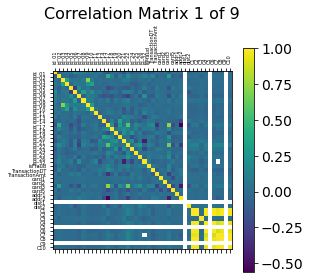

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

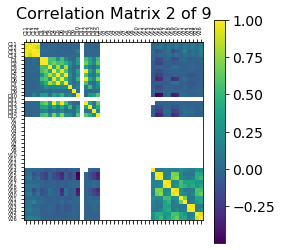

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

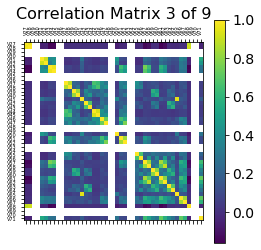

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

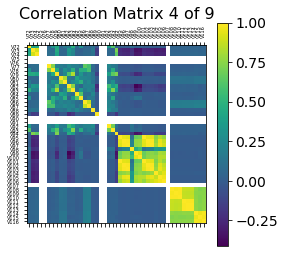

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

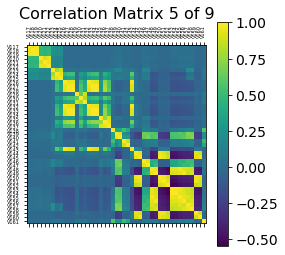

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

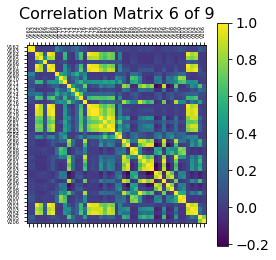

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

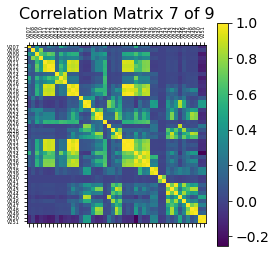

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

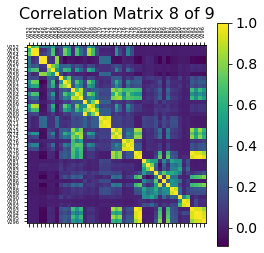

<Figure size 432x288 with 0 Axes>

<Figure size 1368x1080 with 0 Axes>

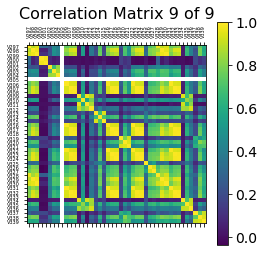

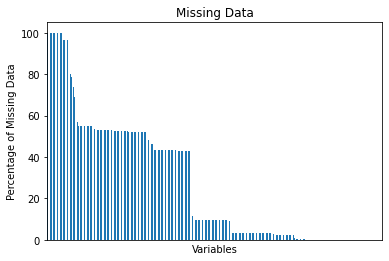

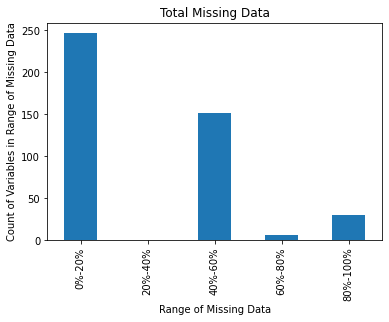

In [29]:
CorrPlot(train_combined,45)#call the function with train_combined data and 30 features per matrix 
GraphMissing(train_combined)#Plot the amount of missing variables for the data passed in 